# Assignment 01: Supervised learning, Linear models, and Loss functions



## Data set 

In this assignment, you'll be working with some data on possums.  It's a relatively small data set, but it's a good size to get you started with ordinary least squares (OLS) and least absolute deviation (LAD), and to gain experience with supervised learning in general.  You're going to write your own methods to fit both OLS and LAD models, and then at the end compare them to the models produced by the `statsmodels` package.

For this assignment, we will examine some data representing possums in Australia and New Guinea.
The code below loads in a pandas data frame with 46 observations on the following 6 variables:

sex: Sex, either m (male) or f (female).  
age: Age in years.  
headL: Head length, in mm.  
skullW: Skull width, in mm.  
totalL: Total length, in cm.  
tailL: Tail length, in cm.

## Task 1: OLS estimation and plotting


In [2]:
#It's dangerous to go alone.  Take these!
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Read in the data you will need for this assignment
possum_data=pd.read_csv('possum.csv')

### Question 1:

Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. Label your plot and your axes. You might want to add an `alpha` in case some data are overlapping.  Perform any other exploratory analysis you think might be useful (optional.)

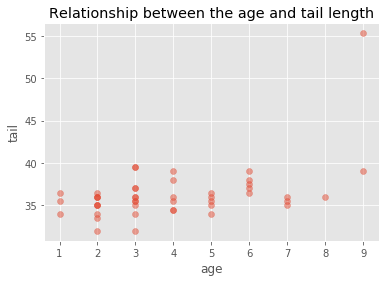

In [32]:
# YOUR CODE HERE
possum_data=pd.read_csv('possum.csv')
age = possum_data['age']
tail = possum_data['tailL']
plt.scatter(age,tail,alpha = 0.5)
plt.xlabel('age')
plt.ylabel('tail')
plt.title('Relationship between the age and tail length')
plt.show()


### Question 2:

Recall that the linear model, we obtain predictions by computing 

$$ \mathbf{\hat{y}} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix, $\beta$ are coefficients, and $\mathbf{\hat{y}}$ are fitted/estimates/predicted values. Define a model-prediction function `yhat = linearModelPredict(beta,X)` that takes a parameter vector `beta` and a matrix `X` of inputs, and produces a vector `yhat` containing the predicted (fitted) values that correspond to each row of the input matrix. Assume that `beta` has $p$ rows and $1$ column, and that `X` has $n$ rows and $p$ columns.

Hint: As of Python 3.5, the `@` symbol can be used for matrix multiplication.

In [5]:
import numpy as np

def linearModelPredict(b,X):
    C = np.array(b) @ np.array(X)
    print(C)
    raise NotImplementedError()
    #return yp


### Question 3:

Write a function `linearModelLossRSS` which computes the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss. Define a squared error loss function `(loss, gradient) = linearModelLossRSS(beta,X,y)` that takes a parameter vector `beta`, a matrix `X` of inputs, and a vector `y` of observed values, and produces the sum of squared errors between the observed and predicted (fitted) values, along with the gradient of the loss. Assume that `theta` has $p$ rows and $1$ column, and that `X` has $n$ rows and $p$ column, and that `y` has `n` rows and `1` column.

In [21]:
import numpy as np

def linearModelLossRSS(b,X,y):
    # YOUR CODE HERE
    predY = simpleRegPredict(b,X)
    residuals = y - predY
    residual_sum_of_squares = sum(residuals**2)
    
    gradient = np.zeros(2)
    gradient[0]=...
    gradient[1]=...
    raise NotImplementedError()
    return (residual_sum_of_squares, gradient)



### Question 4: 

#### Part 1

Now that you've implemented a loss function in question 3, it is now time to minimize it to fit the data!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument an 2d-array `X` which houses the input data with one example per row, as its second argument a 1d-array `y` of outcomes with one example per row, and as its third argument a function `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss.

Use this function to estimate the parameters that describe the relationship between a possum's age and its tail length, i.e., $\widehat{\mathit{TailLength}} = \beta_0 + \beta_1 \mathit{age}$.

In [25]:
from numpy import array 
import scipy.optimize as so

def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    #estimate b to 0
    #minimize the lossfcn
    b0 = [0]
    so.minimize(lossfcn,b0,args=(X,y))
    #computer RSS for linear fit
    linearModelLossRSS(b,x,y)
    R2 = 1 - (linearModelLossRSS(b,x,y)/#TSS)    
    return (estimated_betas,R2)



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

#### Part 2

Using your solution, plot the data points and the fitted line below. Label your plot and your axes.

In [26]:
import scipy.optimize as so
bstart=[0,0]
RESULT=so.minimize(LinearModelLossRSS,bstart,args=(x, y),jac=True)

b=RESULT.x       
yp=linearModelPredict(b,x)

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

regression_line = linearModelFit(tailL,age,lossfcn)
for x in xs :
    regression_line

possum_data=pd.read_csv('possum.csv')
age = possum_data['age']
tail = possum_data['tailL']
plt.scatter(age,tail,alpha = 0.5)
plt.xlabel('age')
plt.ylabel('tail')
plt.title('Relationship between the age and tail length')
plt.plot(xs,regression_line)
plt.show()



NameError: name 'LinearModelLossRSS' is not defined

# Task 2: Least Absolute Deviation Loss

In [28]:
def linearModelLossLAD(b,X,y):
    predY = simpleRegPredict(b,X)
    residuals = y - predY
    sum_abs_res = sum (abs (residuals))
    grad = sum (X * np.sign (residuals))

    return (sum_abs_res, grad)   


### Question 2

Use `linearModelLossLAD` to fit a linear model with least absolute deviation loss.  Report the coefficients of the model, the R squared, and plot the fit.

In [30]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

def LADFit(x,y,lossfcn = linearModelLossLAD):
    b0 =[0]
    so.minimize(lossfcn, b0, args = (x,y))
    linearModelLossLAD(b,x,y)
    yp = linearModelPredict(b,x)


Plot the fit below

In [ ]:
import scipy.optimize as so
bstart=[0,0]
RESULT=so.minimize(LinearModelLossRSS,bstart,args=(x, y),jac=True)

b=RESULT.x       
yp=linearModelPredict(b,x)

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

regression_line = linearModelFit(tailL,age,lossfcn)
for x in xs :
    regression_line

possum_data=pd.read_csv('possum.csv')
age = possum_data['age']
tail = possum_data['tailL']
plt.scatter(age,tail,alpha = 0.5)
plt.xlabel('age')
plt.ylabel('tail')
plt.title('Relationship between the age and tail length')
plt.plot(xs,regression_line)
plt.show()




# Task 3: Comparing With `Statsmodels`


Fit both an OLS and a LAD model with `statsmodels`. Compare coefficient estimates, R squared values, and plot the fits. Discuss any differences or similarities between your implementation and `statsmodels`, and discuss any differences between the OLS model and the LAD model.

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import statsmodels.graphics as smgraphics
import pandas as pd


possum_data=pd.read_csv('possum.csv')
results = smf.ols('age~tailL', data = possum_data).fit()
print(results.summary())

figure = smgraphics.regressionplots.plot_fit(regression,1)



                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     12.62
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000925
Time:                        15:36:29   Log-Likelihood:                -92.800
No. Observations:                  46   AIC:                             189.6
Df Residuals:                      44   BIC:                             193.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7865      3.037     -2.235      0.0

NameError: name 'regression' is not defined

Discuss differences below.

YOUR ANSWER HERE

In [14]:
#There should be almost no difference between the statsmodels and the one with I predict. 

SyntaxError: invalid syntax (<ipython-input-14-e924d2167a48>, line 1)